<a href="https://colab.research.google.com/github/annatutuuu/3D-phase-portrait/blob/main/Colab/Anna/line3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A point is represented as a numpy array [x, y]
# A segment is represented by two points [point1, point2]

def on_segment(p, q, r):
    """Check if point q lies on line segment 'pr'"""
    if (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
            q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1])):
        return True
    return False

def orientation(p, q, r):
    """Find orientation of ordered triplet (p, q, r)"""
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # collinear
    return 1 if val > 0 else 2  # clock or counterclockwise

def do_intersect(s1, s2):
    """Check if segments s1 and s2 intersect"""
    p1, q1 = s1
    p2, q2 = s2
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    # General case
    if o1 != o2 and o3 != o4:
        return True
     # Special Cases
    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True

    return False  # Doesn't fall in any of the above cases

def is_intersect(segments):
    n = len(segments)
    intersect_found = False
    for i in range(n):
        for j in range(i + 1, n):
            if do_intersect(segments[i], segments[j]):
                print(f"Segments {i + 1} and {j + 1} intersect.")
                intersect_found = True
    return intersect_found

In [2]:
#Example
segments = [
    (np.array([1, 5]), np.array([4, 5])),
    (np.array([2, 5]), np.array([10, 1])),
    (np.array([3, 2]), np.array([10, 3])),
    (np.array([6, 4]), np.array([9, 4])),
    (np.array([7, 1]), np.array([8, 1]))
]

if is_intersect(segments):
    print("There are intersecting segments.")
else:
    print("No intersecting segments.")

Segments 1 and 2 intersect.
Segments 2 and 3 intersect.
There are intersecting segments.


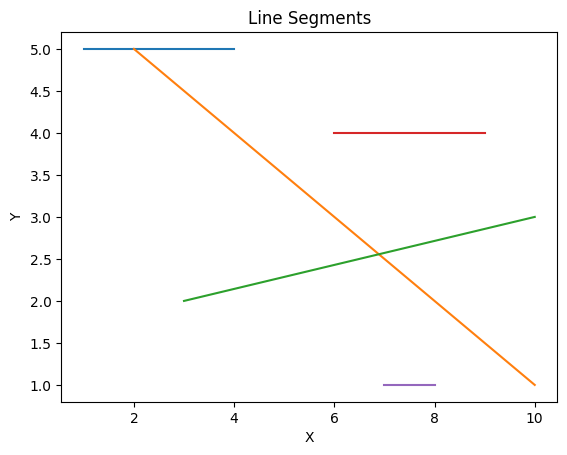

In [7]:
for s in segments:
    plt.plot([s[0][0], s[1][0]], [s[0][1], s[1][1]])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Segments')
plt.show()

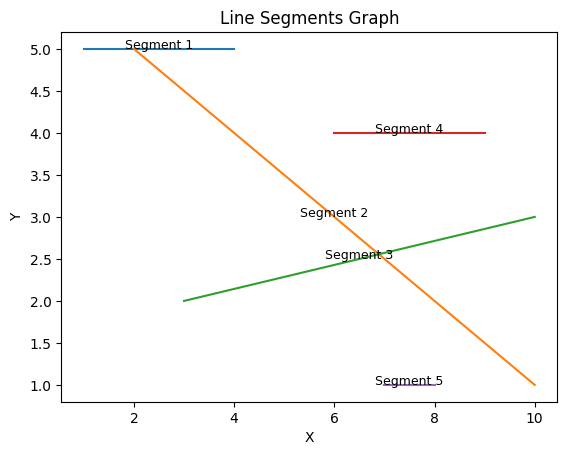

In [8]:
for i, s in enumerate(segments):
    # Calculate the midpoint of the segment for labeling
    midpoint = (s[0] + s[1]) / 2
    # Plot the segment
    plt.plot([s[0][0], s[1][0]], [s[0][1], s[1][1]])
    # Place a text label at the midpoint
    plt.text(midpoint[0], midpoint[1], f'Segment {i+1}', fontsize=9, ha='center')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Segments Graph')
plt.show()